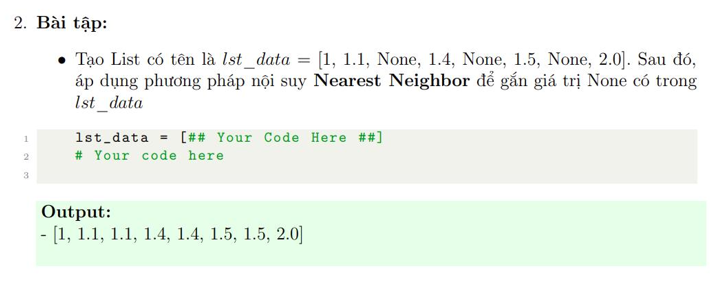

## Buổi 15 - Nearest Neighbor

In [17]:
def lst_add_None(lst):
    lst_add=lst[:]
    
    first_non_none = next((item for item in lst_add if item is not None), None)
    last_non_none = next((item for item in reversed(lst_add) if item is not None), None)

    for index in range(len(lst_add)):       
        if lst_add[index] is None:
            if index == 0 or lst_add[index - 1] is None:
                lst_add[index] = first_non_none
            elif index == len(lst_add)-1 or lst_add[index+1] is None:
                lst_add[index] = last_non_none
            else:
                left = lst_add[index - 1]
                right = lst_add[index + 1]
                lst_add[index] = min(left, right)

    return lst_add

print(lst_add_None([1, 1.1, None, 1.4, None, 1.5, None, 2.0]))
print(lst_add_None([None, 1.1, None, 1.4, None, 1.5, None, 2.0, None]))
print(lst_add_None([None, None, None, 1.4, None, 1.5, None, 2.0, None]))

[1, 1.1, 1.1, 1.4, 1.4, 1.5, 1.5, 2.0]
[1.1, 1.1, 1.1, 1.4, 1.4, 1.5, 1.5, 2.0, 2.0]
[1.4, 2.0, 1.4, 1.4, 1.4, 1.5, 1.5, 2.0, 2.0]


In [18]:
#Cách 2:

def find_none_index(data):
    result = -1
    for i, v in enumerate(data):
        if v == None:
            result = i
            break
    return result

def find_end(data, index):
    end = len(data)
    for i in range(index+1, len(data), 1):
        if data[i] != None:
            end = i
            break
    return end

def interpolate(data, none_position):
    nearest_neighbor = None
    nearest_distance = float('inf')
    for index in range(len(data)):
        if data[index] is not None and abs(index - none_position) < nearest_distance:
            nearest_neighbor = data[index]
            nearest_distance = abs(index - none_position)
    return nearest_neighbor

def process_data(data):
    while True:
        index = find_none_index(data)
        if index == -1:
            break
        
        begin = index - 1
        end = find_end(data, index)
        
        if begin < 0:
            y = data[end]
        elif end >= len(data):
            y = data[begin]
        else:
            y = interpolate(data, index)
        data[index] = y
    return data


print(process_data([1, 1.1, None, 1.4, None, 1.5, None, 2.0]))
print(process_data([None, None, None, 1.4, None, 1.5, None, 2.0]))
print(lst_add_None([None, None, None, 1.7, None, 1.5, None, 2.0, None]))

[1, 1.1, 1.1, 1.4, 1.4, 1.5, 1.5, 2.0]
[1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 2.0]
[1.7, 2.0, 1.7, 1.7, 1.5, 1.5, 1.5, 2.0, 2.0]


In [20]:
# Cách 3
# Xử lý các giá trị None bằng cách lặp qua danh sách hai lần: một lần từ trái sang phải và một lần từ phải sang trái.

def lst_add_nearest_neighbor(lst):
    n = len(lst)
    nearest = lst[:]
    
    # Tạo mảng để lưu khoảng cách tới giá trị không None gần nhất
    dist = [float('inf')] * n  # Khởi tạo khoảng cách là vô cùng
    
    # Điền từ trái sang phải
    for i in range(n):
        if lst[i] is not None:
            nearest[i] = lst[i]
            dist[i] = 0
        elif i > 0 and dist[i-1] != float('inf'):
            nearest[i] = nearest[i-1]
            dist[i] = dist[i-1] + 1

    # Điền từ phải sang trái
    for i in range(n-1, -1, -1):
        if lst[i] is not None:
            nearest[i] = lst[i]
            dist[i] = 0
        elif i < n-1 and dist[i+1] + 1 < dist[i]:
            nearest[i] = nearest[i+1]
            dist[i] = dist[i+1] + 1

    return nearest

# Ví dụ sử dụng
print(lst_add_nearest_neighbor([None, None, None, 1.7, None, 1.5, None, 2.0, None]))


[1.7, 1.7, 1.7, 1.7, 1.7, 1.5, 1.5, 2.0, 2.0]
